<a href="https://colab.research.google.com/github/LinarKulinar/Data-Analysis-Tools-SSAU/blob/main/Lab_6_Linear_models_6133_Akhmetov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 6**

# Линейная Регрессия в sklearn

Выполнил: 6133, Ахметов Линар Габдуллаевич

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### 0. Найти и загрузить датасет, подходящий для регрессии 

Датасет является результатом химического анализа вин, выращенных в одном регионе Италии, но полученных из трех разных сортов винограда. Анализ определил количество 13 компонентов, содержащихся в каждом из трех типов вин.
Таргетом будет процент алкоголя.

Данные представлены на [Kaggle](https://www.kaggle.com/harrywang/wine-dataset-for-clustering).

In [ ]:
df = pd.read_csv('wine-clustering.csv')

## Набор признаков

Признаки:

|   №   | EN                           | RU                                                 |
| :---: | :--------------------------- | :------------------------------------------------- |
|   1   | Alcohol                      | Алкоголь                                           |
|   2   | Malic acid                   | Яблочная кислота                                   |
|   3   | Ash                          | Зола (после испарения и сжигания)                  |
|   4   | Alcalinity of ash            | Щелочность золы                                    |
|   5   | Magnesium                    | Магний                                             |
|   6   | Total phenols                | Количество фенолов                                 |
|   7   | Flavanoids                   | Флавоноиды                                         |
|   8   | Nonflavanoid phenols         | Нефлаваноидные фенолы                              |
|   9   | Proanthocyanins              | Проантоцианы                                       |
|  10   | Color intensity              | Интенсивность цвета                                |
|  11   | Hue                          | Оттенок                                            |
|  12   | OD280/OD315 of diluted wines | OD280/OD315 разбавленных вин (разбавленность вина) |
|  13   | Proline                      | Пролин                                             |

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [ ]:
X = df.drop(['Alcohol'], axis=1)
y = df['Alcohol']

# 2. Визуализировать heatmap-матрицу кореллированности признаков.

<AxesSubplot:>

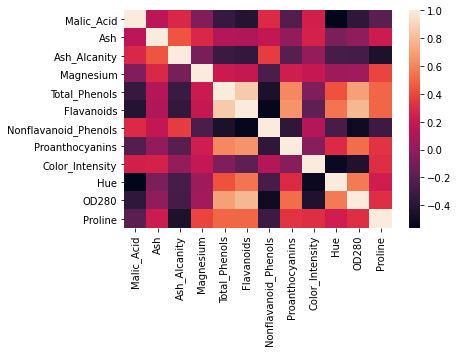

In [ ]:
sns.heatmap(X.corr())

# 3. Визуализировать взаимосвязь между target-переменной и каждым из признаком 

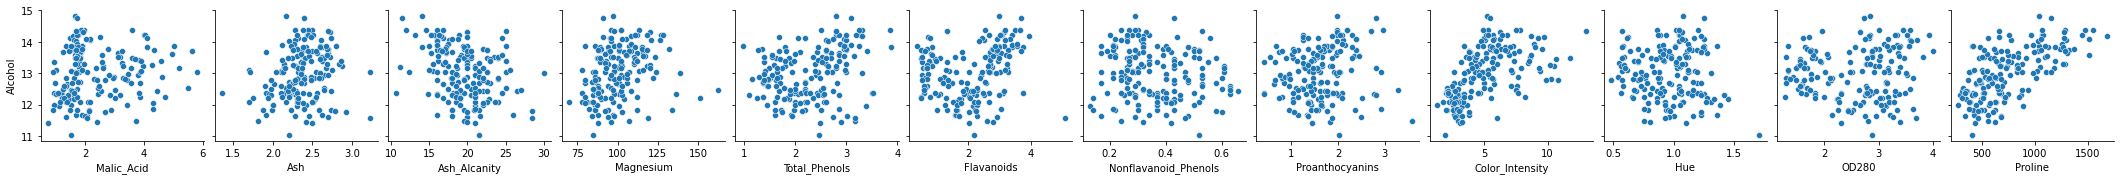

In [ ]:
sns.pairplot(data=df, y_vars=['Alcohol'], x_vars=X.columns)

# 4. Разделить набор данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# 5. Опробовать линейную регрессию

### 5.1 Обучить модель линейной регрессии 

In [ ]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
print('------------train-------------')
print('|MAE: |', mae(y_train, lin_reg.predict(X_train)))
print('|MSE: |', mse(y_train, lin_reg.predict(X_train)))
print('|R2:  |', r2(y_train, lin_reg.predict(X_train)))
print('------------test--------------')
print('|MAE: |', mae(y_test, lin_reg.predict(X_test)))
print('|MSE: |', mse(y_test, lin_reg.predict(X_test)))
print('|R2:  |', mae(y_test, lin_reg.predict(X_test)))
print('------------------------------')

------------train-------------
|MAE: | 0.3959422763193077
|MSE: | 0.25751652904520117
|R2:  | 0.573631186358676
------------test--------------
|MAE: | 0.47507213938335613
|MSE: | 0.320233029909692
|R2:  | 0.47507213938335613
------------------------------


### 5.3 Вывести model.coef_ и model.intercept_

In [ ]:
print('Intercept:', lin_reg.intercept_)
print('Coef:', lin_reg.coef_)

Intercept: 10.59013164020931
Coef: [ 0.10811009  0.16484466 -0.0230253  -0.00101382  0.12008154 -0.04409122
  0.05545038 -0.15465124  0.15143527  0.37845568  0.1652691   0.0010842 ]


### 5.4  Построить график (barh) с важностью коэфициентов при соответствующих признаках 

Text(0, 0.5, 'feature')

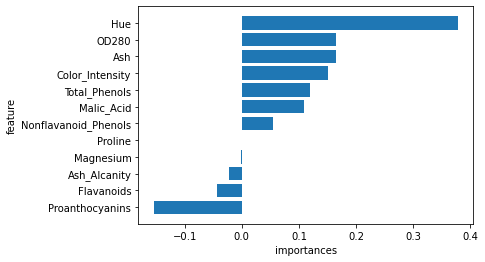

In [ ]:
importances = pd.DataFrame(lin_reg.coef_, 
                           index = X.columns, 
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

# 6. Модель Lasso

### 6.1. Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [ ]:
lasso = Lasso()

parameters = {'alpha': np.linspace(0, 1, 100)}
lasso_grid = GridSearchCV(lasso, parameters, n_jobs=-1)
lasso_grid.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.2626...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])})

In [ ]:
lasso = lasso_grid.best_estimator_ 

### 6.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
print('--------------train-----------')
print('|MAE: |', mae(y_train, lasso.predict(X_train)))
print('|MSE: |', mse(y_train, lasso.predict(X_train)))
print('|R2:  |', r2(y_train, lasso.predict(X_train)))
print('---------------test-----------')
print('|MAE: |', mae(y_test, lasso.predict(X_test)))
print('|MSE: |', mse(y_test, lasso.predict(X_test)))
print('|R2:  |', mae(y_test, lasso.predict(X_test)))
print('------------------------------')

--------------train-----------
|MAE: | 0.42014660374443175
|MSE: | 0.2913549521666579
|R2:  | 0.5176050804800268
---------------test-----------
|MAE: | 0.5035770134932578
|MSE: | 0.3641731557066184
|R2:  | 0.5035770134932578
------------------------------


### 6.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
print('Intercept:', lasso.intercept_)
print('Coef:', lasso.coef_)

Intercept: 11.546586430673518
Coef: [ 0.          0.         -0.         -0.00032626  0.          0.
  0.         -0.          0.08500823 -0.          0.          0.00141293]


### 6.4 Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

Text(0, 0.5, 'feature')

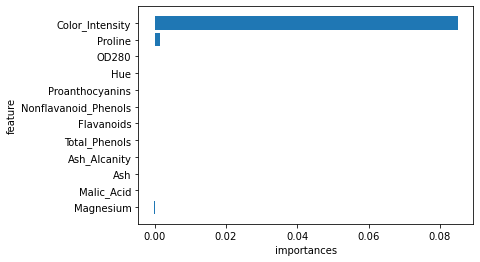

In [ ]:
importances = pd.DataFrame(lasso.coef_, 
                           index = X.columns, 
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

# 7. Модель Ridge

### 7.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha

In [ ]:
ridge = Ridge()
parameters = {'alpha': np.linspace(0, 1, 100)}
ridge_grid = GridSearchCV(ridge, parameters, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.2626...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])})

In [ ]:
ridge = ridge_grid.best_estimator_

### 7.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
print('--------------train-----------')
print('|MAE: |', mae(y_train, ridge.predict(X_train)))
print('|MSE: |', mse(y_train, ridge.predict(X_train)))
print('|R2:  |', r2(y_train, ridge.predict(X_train)))
print('--------------test------------')
print('|MAE: |', mae(y_test, ridge.predict(X_test)))
print('|MSE: |', mse(y_test, ridge.predict(X_test)))
print('|R2:  |', mae(y_test, ridge.predict(X_test)))
print('------------------------------')

--------------train-----------
|MAE: | 0.3945563347024452
|MSE: | 0.25780051963978673
|R2:  | 0.573160984568726
--------------test------------
|MAE: | 0.4718416024866051
|MSE: | 0.3148861608386861
|R2:  | 0.4718416024866051
------------------------------


### 7.3 Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
print('Intercept:', ridge.intercept_)
print('Coef:', ridge.coef_)

Intercept: 10.738383131122877
Coef: [ 0.10280146  0.14529445 -0.02200488 -0.00093941  0.11357467 -0.02913174
  0.0460009  -0.15107721  0.14631068  0.26349706  0.15784744  0.00111088]


### 7.4 Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

Text(0, 0.5, 'feature')

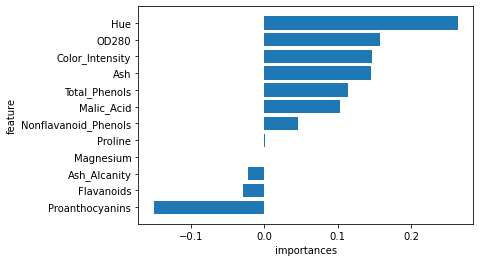

In [ ]:
importances = pd.DataFrame(ridge.coef_, 
                           index = X.columns, 
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

# 8. Опробовать регрессию ElasticNet

### 8.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [ ]:
el_net = ElasticNet()
parameters = {'alpha': np.linspace(0, 1, 100),
              'l1_ratio': np.linspace(0, 1, 100)}

el_net_grid = GridSearchCV(el_net,parameters, n_jobs=-1)
el_net_grid.fit(X_train, y_train)
el_net_grid.best_estimator_

ElasticNet(l1_ratio=0.10101010101010102)

### 8.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
el_net = el_net_grid.best_estimator_

print('--------------train-----------')
print('|MAE: |', mae(y_train, el_net.predict(X_train)))
print('|MSE: |', mse(y_train, el_net.predict(X_train)))
print('|R2:  |', r2(y_train, el_net.predict(X_train)))
print('--------------test------------')
print('|MAE: |', mae(y_test, el_net.predict(X_test)))
print('|MSE: |', mse(y_test, el_net.predict(X_test)))
print('|R2:  |', mae(y_test, el_net.predict(X_test)))
print('------------------------------')

--------------train-----------
|MAE: | 0.42021798875923466
|MSE: | 0.29063917383860177
|R2:  | 0.5187901910346581
--------------test------------
|MAE: | 0.5032492088336009
|MSE: | 0.3635929620000424
|R2:  | 0.5032492088336009
------------------------------


### 8.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
print('Intercept:', el_net.intercept_)
print('Coef:', el_net.coef_)

Intercept: 11.575853336769157
Coef: [ 0.00191927  0.         -0.         -0.00075217  0.          0.
  0.         -0.          0.08554482 -0.          0.          0.00142171]


### 8.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

Text(0, 0.5, 'feature')

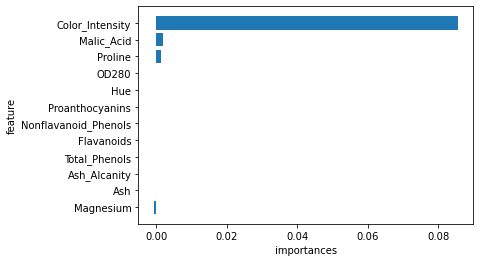

In [ ]:
importances = pd.DataFrame(el_net.coef_, 
                           index = X.columns, 
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

In [ ]:
names = {
    lin_reg: 'reg',
    lasso: 'lasso',
    ridge: 'ridge', 
    el_net: 'elastic'
}
print("{:8s} | {:8s} | {:8s} | {:8s}  | {:8s} ".format('name', 'dataset', 'mae', 'mse', 'r2'))

for mod in [lin_reg, lasso, ridge, el_net]:
    print("-" * 53)
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
        names[mod], 
        'test', 
        mae(y_test, mod.predict(X_test)), 
        mse(y_test, mod.predict(X_test)), 
        r2(y_test, mod.predict(X_test))))
    print("{:8s} | {:8s} | {:8.5f} | {:8.5f} | {:8.5f} ".format(
      names[mod], 
        'train', 
        mae(y_train, mod.predict(X_train)), 
        mse(y_train, mod.predict(X_train)), 
        r2(y_train, mod.predict(X_train))))

name     | dataset  | mae      | mse       | r2       
-----------------------------------------------------
reg      | test     |  0.47507 |  0.32023 |  0.59920 
reg      | train    |  0.39594 |  0.25752 |  0.57363 
-----------------------------------------------------
lasso    | test     |  0.50358 |  0.36417 |  0.54420 
lasso    | train    |  0.42015 |  0.29135 |  0.51761 
-----------------------------------------------------
ridge    | test     |  0.47184 |  0.31489 |  0.60589 
ridge    | train    |  0.39456 |  0.25780 |  0.57316 
-----------------------------------------------------
elastic  | test     |  0.50325 |  0.36359 |  0.54493 
elastic  | train    |  0.42022 |  0.29064 |  0.51879 


# 9 Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

Все результаты вышли примерно одинаковыми, но мы можем видеть, что у Ridge значение R2 наиболее близко к единице, поэтому данная модель наилучшая.

In [ ]:
best_reg = ridge

In [ ]:
print('-------------test-------------')
print('|MAE: |', mae(y_test, best_reg.predict(X_test)))
print('|MSE: |', mse(y_test, best_reg.predict(X_test)))
print('|R2:  |', r2(y_test, best_reg.predict(X_test)))
print('------------------------------')

-------------test-------------
|MAE: | 0.5035770134932578
|MSE: | 0.3641731557066184
|R2:  | 0.5442032304179989
------------------------------


### 10 Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных

Данные изначально не содержат категориальных колонок, поэтому ради научного интереса посмотрим, как изменится результат после применения StandartScaler

### 11  Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
print('--------------test------------')
print('|MAE: |', mae(y_test, ridge.predict(X_test)))
print('|MSE: |', mse(y_test, ridge.predict(X_test)))
print('|R2:  |', r2(y_test, ridge.predict(X_test)))
print('------------------------------')

--------------test------------
|MAE: | 0.4718416024866051
|MSE: | 0.3148861608386861
|R2:  | 0.6058905148627265
------------------------------


### 12 Прогоняем наш датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.



In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_1 = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=42)


ridge.fit(X_train, y_train)

Ridge()

In [ ]:
print('--------------test------------')
print('|MAE: |', mae(y_test, ridge.predict(X_test)))
print('|MSE: |', mse(y_test, ridge.predict(X_test)))
print('|R2:  |', r2(y_test, ridge.predict(X_test)))
print('------------------------------')

--------------test------------
|MAE: | 0.37823625708198755
|MSE: | 0.19537317724487163
|R2:  | 0.652708049209046
------------------------------


13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

Text(0, 0.5, 'feature')

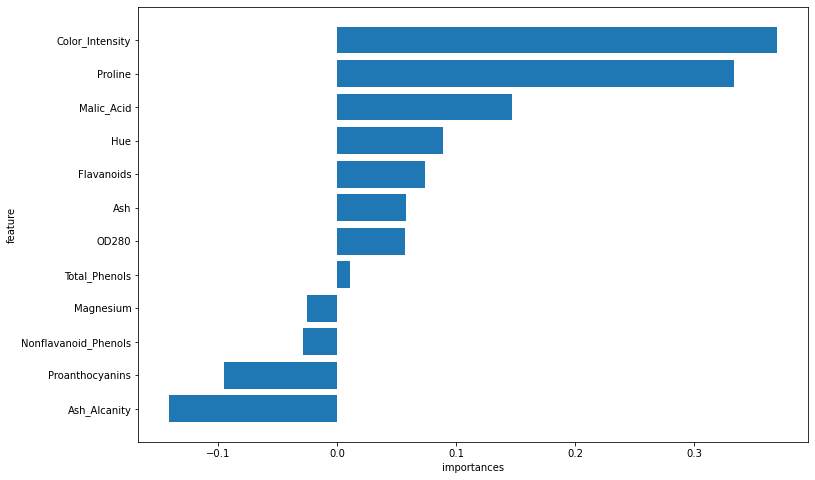

In [ ]:
plt.figure(figsize=(12, 8))
importances = pd.DataFrame(ridge.coef_, 
                           index = X.columns, 
                           columns=['importance']).sort_values('importance', ascending=False)

importances = importances.sort_values('importance', ascending=True)
plt.barh(range(len(X.columns)), importances['importance'])
plt.yticks(range(len(X.columns)), importances.index)
plt.xlabel("importances")
plt.ylabel("feature")

**Вывод:** Как мы можем видеть, применение StandardScaler к исходным данным, даже при том, что они содержат только вещественные значения, отлично сказывается на результате, таким образом мы приблизили R2 на 0.05 к единице